In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('nature')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
plt.style.use('nature')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [3]:
results = pd.read_csv('results.csv')
results

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),dA(C),oisorat,...,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.238,0.062,8.723,0.083,9.860,0.12,0.52,...,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.19,-0.38
1,HD 182040,dlHdC,5750,9.084,0.081,7.993,0.063,9.895,0.13,0.58,...,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.40,-0.15,-0.21
2,C38,dlHdC,5750,9.469,0.084,8.989,0.095,10.320,0.16,0.73,...,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.730,0.094,8.195,0.093,9.480,0.24,0.52,...,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.089,0.102,8.550,0.103,10.026,0.25,0.78,...,0.32,0.5610,-0.0850,0.0820,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.175,0.141,8.806,0.097,10.165,0.14,0.32,...,0.28,0.7610,-0.1380,0.0890,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21,RCB,5000,7.736,0.086,7.767,0.162,8.860,0.06,7.54,...,4.14,0.1160,-0.0380,0.0500,-0.92,-1.37,-1.18,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.454,0.151,7.193,0.097,8.900,0.06,7.18,...,6.38,0.1230,-0.0540,0.0630,-0.80,-1.20,-1.56,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,6.949,0.111,7.763,0.136,8.950,0.05,69.03,...,227.74,0.0145,-0.0113,0.0139,-1.03,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.590,0.130,7.420,0.100,8.720,0.06,92.93,...,500.00,0.0105,-0.0105,0.0154,-0.92,-1.23,-1.75,-1.56,0.01,-0.57


In [4]:
np.mean(results[results['Type'] == "dlHdC"]['A(C)'])-9.52

np.float64(0.43766666666666687)

In [5]:
np.mean(results[results['Type'] == "RCB"]['[Fe]'])

np.float64(-0.8416666666666665)

In [6]:
np.mean(results['[Fe]'])

np.float64(-0.57)

In [7]:
plt.style.use('default')
plt.style.use(['science', 'notebook'])

In [8]:
teffs = results['Teff']
types = results['Type']
names = results['Star']

In [9]:
cs = ['#FF7F0E' if typ == "RCB" else '#1F77B4' for typ in types]
labels = ['RCB' if typ == "RCB" else 'dLHdC' for typ in types]

In [10]:
teffs.iloc[4] -= 50
teffs.iloc[1] += 50
teffs.iloc[-2] -= 50
teffs.iloc[-1] += 50
teffs.iloc[0] -= 50
teffs.iloc[5] +=50

/tmp/ipykernel_1387682/998464170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[4] -= 50
/tmp/ipykernel_1387682/998464170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[1] += 50
/tmp/ipykernel_1387682/998464170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[-2] -= 50
/tmp/ipykernel_1387682/998464170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [11]:
props = pd.read_csv("./hdc_model_properties.csv")
np.max(props['16O/18O'])

np.float64(198.4)

In [12]:
logteffmodel = props['log(TeffHdC)']
teffmodel = 10**logteffmodel
ratmodel = props['16O/18O']
massmodel = props['Mtotal']
qmodel = props['q']

In [13]:
plt.style.use('default')
plt.style.use(['science', 'nature'])
# plt.rcParams.update({'figure.autolayout': False})

In [14]:
names2 = np.copy(names)
names2[-1] = "WISE J1818+"

In [15]:
oisorats

NameError: name 'oisorats' is not defined

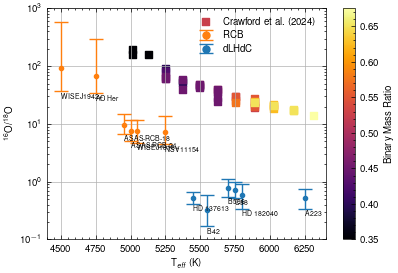

In [20]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
i = 1
# set random seed
np.random.seed(42705)
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    print(len(indices))
    n = len(indices)
    alternating_array = np.tile([1, -1], n // 2 + 1)[:n]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    # teffs2[indices] += alternating_array*50
    teffs2[indices] += shifts*0
    i *= -1
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
plt.figure(figsize=(3*1.5, 3))
for i in range(len(oisorats)):
    if oisorats[i] <50:
        plt.text(teffs2[i], 0.95*oisorats[i]-oisorat_errs[0][i], names2[i], fontsize=5, ha='left', va='top')
    else:
        plt.text(teffs2[i], 0.95*oisorats[i]-oisorat_errs[0][i], names2[i], fontsize=5, ha='left', va='top')
    plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=3, color=cs[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.scatter(teffmodel, ratmodel, c=qmodel, s=25, label = "Crawford et al. (2024)", marker = 's', cmap = 'inferno')
plt.colorbar(label = "Binary Mass Ratio")

plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")

plt.xlim(4400, 6400)
plt.ylim(1e-1, 1e3)
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$^{16}$O/$^{18}$O")
# plt.scatter(teffmodel-500, ratmodel/2.7, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()
plt.legend()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./plots/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/teff-v-ratio2.pdf", dpi=300)
plt.show()


In [21]:
names

0       HD 137613
1       HD 182040
2             C38
3            A223
4            B566
5             B42
6     ASAS-RCB-21
7        NSV11154
8          AO Her
9     WISE J1942+
10    ASAS-RCB-18
11    WISE J1818+
Name: Star, dtype: object

In [22]:
xoffs = np.zeros(len(names))
yoffs = np.zeros(len(names))
xoffs[0] = -180
xoffs[4] = -100
yoffs[2] = +0.8
xoffs[9] = -70
xoffs[10] = -300
yoffs[6] = 14
xoffs[6] = -130
xoffs[11] = -110
xoffs[7] = +30

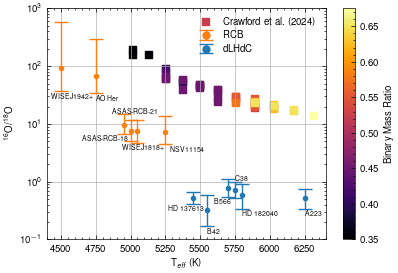

In [25]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
i = 1
# set random seed
np.random.seed(42705)
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    print(len(indices))
    n = len(indices)
    alternating_array = np.tile([1, -1], n // 2 + 1)[:n]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    # teffs2[indices] += alternating_array*50
    teffs2[indices] += shifts*0
    i *= -1
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
plt.figure(figsize=(3*1.5, 3))
for i in range(len(oisorats)):
    if oisorats[i] <50:
        plt.text(teffs2[i] + xoffs[i], yoffs[i] + 0.95*oisorats[i]-oisorat_errs[0][i], names2[i], fontsize=5, ha='left', va='top')
    else:
        plt.text(teffs2[i]+ xoffs[i],yoffs[i] + 0.95*oisorats[i]-oisorat_errs[0][i], names2[i], fontsize=5, ha='left', va='top')
    plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=3, color=cs[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.scatter(teffmodel, ratmodel, c=qmodel, s=25, label = "Crawford et al. (2024)", marker = 's', cmap = 'inferno')
plt.colorbar(label = "Binary Mass Ratio")

plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")

plt.xlim(4400, 6400)
plt.ylim(1e-1, 1e3)
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$^{16}$O/$^{18}$O")
# plt.scatter(teffmodel-500, ratmodel/2.7, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()
plt.legend()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./plots/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/teff-v-ratio2.pdf", dpi=300)
plt.show()


In [26]:
ACs = results['A(C)'].values
dACs = results['dA(C)'].values
ANs = results['A(N)'].values
dANs = results['dA(N)'].values
AOs = results['A(O)'].values
dAOs = results['dA(O)'].values

xFes = results['[Fe]'].values
AFes = xFes + solar_abundances['Fe']

o18rats = results['18Orat'].values
o18rat_errs = [(np.abs(results['18Orat_low'].values), results['18Orat_high'].values)]
o18rat_errs = [np.mean(o18rat_errs[i], axis=0) for i in range(len(o18rat_errs))][0]
o18rat_errs

array([0.054  , 0.116  , 0.077  , 0.084  , 0.0835 , 0.1135 , 0.044  ,
       0.0585 , 0.0126 , 0.01295, 0.033  , 0.048  ])

In [27]:
ao18errs

NameError: name 'ao18errs' is not defined

In [28]:
from scipy.optimize import curve_fit


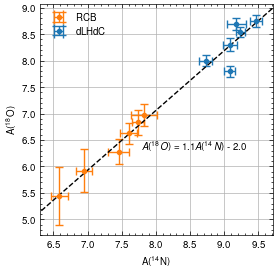

In [30]:
ao18errs = np.sqrt(dAOs**2 + (o18rat_errs/o18rats/np.log(10))**2)
fig = plt.figure(figsize=(3,3))
o18fe = np.log10(o18rats)+AOs
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    
    nfe = ANs[i]
    # plt.text(nfe+0.1, o18fe-0.2, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(nfe, o18fe[i], xerr=dANs[i], yerr=ao18errs[i], fmt='o', capsize=3, ms=3, color=cs[i])
    # swap axes

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')
xlims = plt.xlim()
ylims = plt.ylim()

plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = 1, fmt='o', capsize=5, ms=3, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = 1, fmt='o', capsize=5, ms=3, color="#1F77B4", label = "dLHdC")

plt.xlim(xlims)
plt.ylim(ylims)
# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.ylabel(r"A($^{18}$O)")
plt.xlabel(r"A($^{{14}}$N)")
xlim0 = plt.ylim()


def linear_model(x, a, b):
    return a * x + b

x_data = ANs
y_data = o18fe
x_err = dANs
y_err = ao18errs

# Perform the fit, accounting for errors in y
popt, pcov = curve_fit(linear_model, x_data, y_data, sigma=y_err, absolute_sigma=True)

# Extract parameter errors from the covariance matrix
perr = np.sqrt(np.diag(pcov))

# Generate points for the fitted line
x_fit = np.linspace(6, 10, 100)
y_fit = linear_model(x_fit, *popt)

plt.plot(x_fit, y_fit, 'k--')
plt.text(7.8, 6.5, f"$A(^{{18}}O$) = {popt[0]:.1f}$A(^{{14}}N$) - {-popt[1]:.1f}", fontsize=7, ha='left', va='top')


# plt.ylim(-4.1, xlim0[1])
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.legend()
# plt.xscale('log')
plt.grid()
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/nfe-v-o18fe.pdf", dpi=300)


In [32]:
perr

array([0.06630942, 0.59142645])

In [31]:
m, c = np.polyfit(ANs, o18fe, 1)
m, c

(np.float64(1.1354445293839266), np.float64(-2.0159339923028217))

In [33]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
# star = "AOHer"
# observed_file = f"{observed_path}/{star}.txt"
# observed_data = np.loadtxt(observed_file, unpack=True)
# obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

In [34]:
rcb_stars = ["IRAS18135", "WISEJ1942","NSV11154", "WISE222", "AOHer","ASAS-RCB-18", "ASAS-RCB-21"]
names = ["IRAS 1813+", "WISE J1942+","NSV11154", "WISE J1818+", "AO Her","ASAS-RCB-18", "ASAS-RCB-21"]
rcb_data = {}
i = 0 
for star in rcb_stars:
    if rcb_stars.index(star) > -1:
        try:
            observed_file = f"{observed_path}/{star}_clean.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)

        except:
            observed_file = f"{observed_path}/{star}.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        rcb_data[star] = [obs_wave/1e4, obs_flux, obs_err, names[i]]
        i+=1


In [35]:
rcb_stars.index("ASAS-RCB-18")

5

In [36]:
CN_synth_data = np.loadtxt(f"{observed_path}/ASAS-RCB-21_CN_synthetic.txt", unpack=True)
CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

In [37]:
CN_wave

array([2.25481   , 2.25481225, 2.25481451, ..., 2.500295  , 2.5002975 ,
       2.5003    ])

In [38]:
colors = {
    'blue':    '#1F77B4', 
    'orange':  '#FF7F0E',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#9467BD',
    'gray':    '#7F7F7F',
    'red':     '#D62728',
    'yellow':  '#dede00',
    'pink': '#E377C2',
    'olive': "BCBD22"

} 

In [43]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin = np.min(obs_wave).round(2)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.5
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 7.696
oguess = 7.708
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.73-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 
rat = 6.85
vmac = 6
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [47]:
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN+C2"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
lists['atoms'] = basepath + "atoms_5500K_newCI"

In [48]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
CN_wave, CN_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
CN_wave = CN_wave/1e4

Trimming
Trimming done
Running TS
TS completed


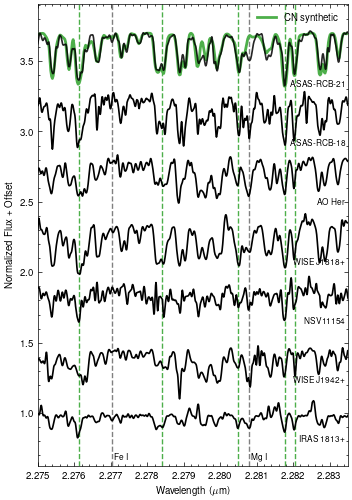

In [49]:
plt.figure(figsize=(4, 6))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
offset2 = 0
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.67, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.67, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.2784 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color=colors['green'], linestyle='--')

for star in rcb_stars:
    if rcb_stars.index(star) > -1:
        if star == "ASAS-RCB-21":
            plt.plot(CN_wave, CN_flux + offset, colors['green'], lw = 2.0, label = "CN synthetic")
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.8 + offset2, rcb_data[star][-1], fontsize=6, horizontalalignment = 'right')
        offset += 0.45
        offset2 += 0.42

ylim0, ylim1 = plt.ylim()
plt.ylim(ylim0, ylim1+0.0)

plt.legend(loc='upper right')
# plt.savefig("./plots/RCB_CN.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/RCB_CN.pdf", dpi = 300, bbox_inches='tight')


In [87]:
rcb_stars[star]

TypeError: list indices must be integers or slices, not str

In [50]:
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : nguess-7.98, "O" : 8.8+0.3-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 


In [51]:
lmin, lmax = 2.427*1e4, 2.4337*1e4
oguess2 = oguess + np.log10(rat/(1+rat)) - 0.1
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess2-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 
free_isotopes = {"8.016" : 1, "8.017": 0.0, "8.018": 0}
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wave, C16O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
oguess2 = oguess + np.log10(1/(1+rat))
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess2-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 
turbospectrum_paths['line_list_path'] = lists['12C18O']
free_isotopes = {"8.016" : 0, "8.017": 0.0, "8.018": 1}
wave, C18O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
wave *= 1e-4

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


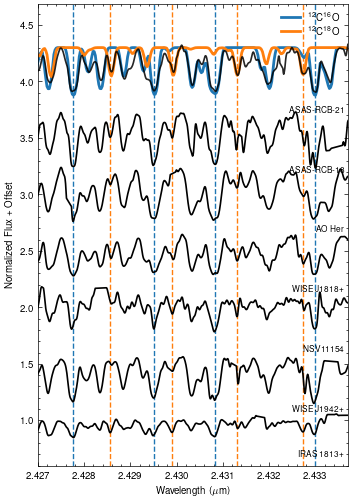

In [52]:
plt.figure(figsize=(4, 6))
plt.xlim(lmin*1e-4, lmax*1e-4)
# plt.ylim(0.45, 3.8)
offset = 0 
offset2 = 0
# plt.axvline(2.27704, color='gray', linestyle='--')

# plt.axvline(2.2808, color='gray', linestyle='--')
# plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
# plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

# CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
# for line in CN_lines:
#     plt.axvline(line, color=colors['green'], linestyle='--')
C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')
C16O_lines = [2.42776, 2.42952, 2.433-2e-5, 2.431-1.7e-4]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')
for star in rcb_stars:
    if rcb_stars.index(star) > -1:
        if star == "ASAS-RCB-21":
            plt.plot(wave, C16O_flux + offset, colors['blue'], lw = 2.0, label = r"$^{12}$C$^{16}$O")
            plt.plot(wave, C18O_flux + offset, colors['orange'], lw = 2.0, label = r"$^{12}$C$^{18}$O")
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        # plt.text(lmax*1e-4-0.0001, 0.55 + offset, star, fontsize=6, horizontalalignment = 'right')
        if star == 'IRAS18135':
            plt.text(lmax*1e-4-0.0001, 0.68 + offset2, rcb_data[star][-1], fontsize=6, horizontalalignment = 'right')
        else:
            plt.text(lmax*1e-4-0.0001, 0.55 + offset2, rcb_data[star][-1], fontsize=6, horizontalalignment = 'right')
        offset += 0.55
        offset2 += 0.53
ylim0, ylim1 = plt.ylim()
plt.ylim(ylim0, ylim1+0.15)

plt.legend(loc='upper right')
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/RCB_CO.pdf", dpi = 300, bbox_inches='tight')


In [53]:
hdc_stars = [ "A223","B42","C38",   "B566","HD182040", "HD137613"]
hdc_data = {}
for star in hdc_stars:
    if hdc_stars.index(star) > -1:
        try:
            observed_file = f"{observed_path}/{star}_clean.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)

        except:
            observed_file = f"{observed_path}/{star}.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        hdc_data[star] = [obs_wave/1e4, obs_flux, obs_err]

In [54]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
lists['atoms'] = basepath + "atoms_5500K_newCI"

teff = 5500
logg = 1.0
met = 0.0
vmic = 6.5
lmin, lmax = 2.275*1e4, 2.2835*1e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess =  9.325
oguess = 8.794
rat = 0.52
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.52-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 
# nguess = 
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.72-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe":-0.2, "Mg":+0.43, "Na":0.32, "Ca":-0.22, "S":-0.13} 

vmac = 0
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [55]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
CN_wave, CN_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed


In [56]:
# CN_synth_data = np.loadtxt(f"{observed_path}/HD137613_CN_synthetic.txt", unpack=True)
# CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

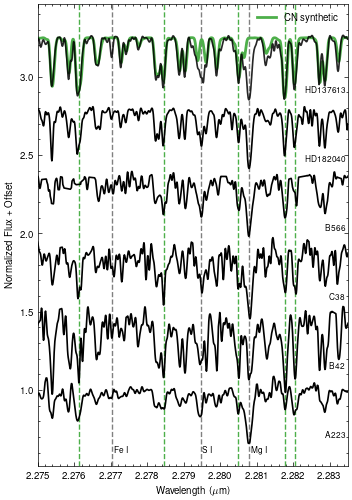

In [63]:
plt.figure(figsize=(4, 6))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
offset2 = 0
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.axvline(2.27946, color='gray', linestyle='--')
plt.text(2.27708, 0.6, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.6, "Mg I", fontsize=6, horizontalalignment = 'left')
plt.text(2.2795, 0.6, "S I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color=colors['green'], linestyle='--')

for star in hdc_stars:
    if hdc_stars.index(star) > -1:
        if star == "HD137613":
            plt.plot(CN_wave, CN_flux + offset, colors['green'], lw = 2.0, label = "CN synthetic")
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.7 + offset2, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.45
        offset2 += 0.44

ylim0, ylim1 = plt.ylim()
plt.ylim(ylim0, ylim1+0.0)

plt.legend(loc='upper right')
# plt.savefig("./plots/HDC_CN.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/HDC_CN.pdf", dpi = 300, bbox_inches='tight')


In [258]:
element_abundances["O"] = 8.7 - 8.77
rat = 0.52
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}


In [259]:
element_abundances

{'H': -4.5,
 'He': 0.5700000000000003,
 'C': 1.1600000000000001,
 'N': 1.3449999999999989,
 'O': -0.07000000000000028,
 'Fe': -0.2,
 'Mg': 0.43,
 'Na': 0.32,
 'Ca': -0.22,
 'S': -0.13}

In [260]:
lmin, lmax = 2.427*1e4, 2.4337*1e4
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wave, C16O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C18O']
wave, C18O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
wave *= 1e-4

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


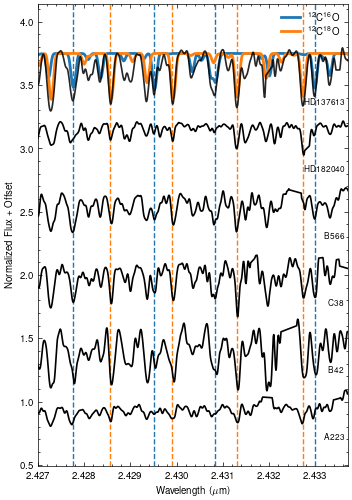

In [268]:
plt.figure(figsize=(4, 6))
plt.xlim(lmin*1e-4, lmax*1e-4)
# plt.ylim(0.45, 3.8)
offset = 0 
offset2 = 0
# plt.axvline(2.27704, color='gray', linestyle='--')

# plt.axvline(2.2808, color='gray', linestyle='--')
# plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
# plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

# CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
# for line in CN_lines:
#     plt.axvline(line, color=colors['green'], linestyle='--')
C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')
C16O_lines = [2.42776, 2.42952, 2.433-2e-5, 2.431-1.7e-4]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')
for star in hdc_stars:
    if hdc_stars.index(star) > -1:
        if star == "HD137613":
            plt.plot(wave, C16O_flux + offset, colors['blue'], lw = 2.0, label = r"$^{12}$C$^{16}$O")
            plt.plot(wave, C18O_flux + offset, colors['orange'], lw = 2.0, label = r"$^{12}$C$^{18}$O")
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        # plt.text(lmax*1e-4-0.0001, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        # offset += 0.5
        if star == 'IRAS18135':
            plt.text(lmax*1e-4-0.0001, 0.68 + offset2, star, fontsize=6, horizontalalignment = 'right')
        else:
            plt.text(lmax*1e-4-0.0001, 0.7 + offset2, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.55
        offset2 += 0.53
ylim0, ylim1 = plt.ylim()
plt.ylim(ylim0, ylim1+0.15)

plt.legend(loc='upper right')
# plt.legend(fontsize = 8, loc = 'upper right')
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/HDC_CO.pdf", dpi = 300, bbox_inches='tight')


In [9]:
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"

lists['atoms'] = basepath + "atoms_5000K"

lines = pd.read_csv("/media/advait/DATA/research/rcb-project/code/lineranges/atomic.csv")
lines['wav'] = lines['wav']*1e-4

In [10]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin = 2.278e4
lmax = 2.289e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 7.876
oguess = 7.74
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.87-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Mg":-1.2, "S" : -1, "Si":-1, "Ca":-0.8, "Fe":-0.8}
                    #  "Fe" : -1.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1, "Ca":-1, "Co":-1} 
rat = 7.47
vmac = 4
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [11]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
wavelength, syntflux_CN = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['C2'] 
wavelength3, syntflux_C2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)


turbospectrum_paths['line_list_path'] = lists['atoms'] 
wavelength4, syntflux_atoms = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5000K/"
wavelength, syntflux_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [20]:
rcb_data['WISE222']

[array([2.25527897, 2.2552885 , 2.2552978 , ..., 2.54844294, 2.54864938,
        2.54865915]),
 array([0.99877874, 0.98245891, 0.97341263, ..., 1.08997299, 1.06946398,
        1.04305983]),
 array([0.1115, 0.0733, 0.0476, ..., 0.2191, 0.1965, 0.1555])]

In [21]:
wavelength *= 1e-4

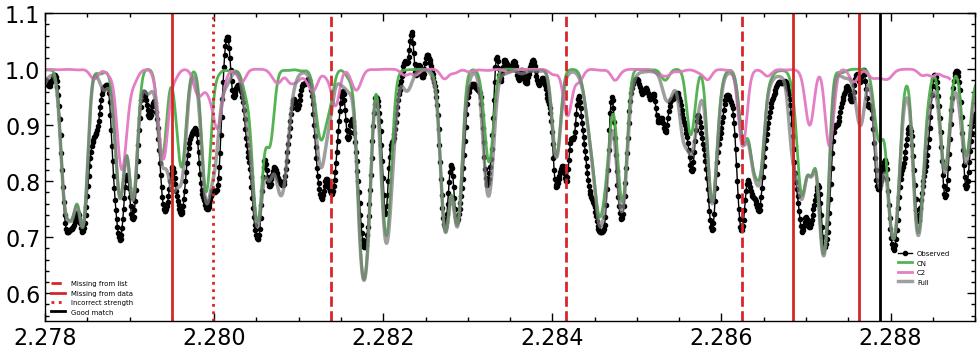

In [29]:
import matplotlib.pyplot as plt

# Plotting the main figure
# plt.figure(figsize=(8.5, 2.5))
plt.figure(figsize=(12, 4))
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.55, 1.1)

# Main plot lines
line1, = plt.plot(rcb_data['WISE222'][0], rcb_data['WISE222'][1], 'k.-', lw=1., label="Observed")
line2, = plt.plot(wavelength, syntflux_CN, colors['green'], lw=2, alpha=0.95, label="CN")
line3, = plt.plot(wavelength-6e-4, syntflux_C2, colors['pink'], lw=2, alpha=0.95, label="C2")
line4, = plt.plot(wavelength, syntflux_all, colors['gray'], lw=2.5, alpha=0.75, label="Full")

# Custom legend for spectral lines
not_in_list = [2.28138, 2.28416, 2.28624]
first_missing = plt.axvline(not_in_list[0], c=colors["red"], ls="--", label="Missing from list")
for line in not_in_list[1:]:
    plt.axvline(line, c=colors["red"], ls="--")

not_in_data = [2.2795, 2.28685, 2.28763]
first_missing_data = plt.axvline(not_in_data[0], c=colors["red"], ls="-", label="Missing from data")
for line in not_in_data[1:]:
    plt.axvline(line, c=colors["red"], ls="-")

incorrect_strength = plt.axvline(2.28 - 1e-5, ls=":", c=colors["red"], label="Incorrect strength")
good_match = plt.axvline(2.288 - 1.2e-4, color="k", label="Good match")

# First legend for main plot lines
main_legend = plt.legend(handles=[line1, line2, line3, line4], fontsize=5, loc="upper left", bbox_to_anchor=(0.91, 0.25))

# Add the first legend to the plot explicitly so it remains when we add the second legend
plt.gca().add_artist(main_legend)

# Second legend for spectral line annotations
plt.legend(handles=[first_missing, first_missing_data, incorrect_strength, good_match],
           fontsize=5, loc="lower left", bbox_to_anchor=(0, 0))

# plt.savefig("plots/C2.pdf", dpi = 300, bbox_inches='tight')
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/C2.pdf", dpi = 300, bbox_inches='tight')
